In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist

In [2]:
moons = pd.read_csv('/Users/rutvikdhopate/Downloads/moons_data.csv')

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data = np.column_stack((moons['Xmoons_X1'],moons['Xmoons_X2']))

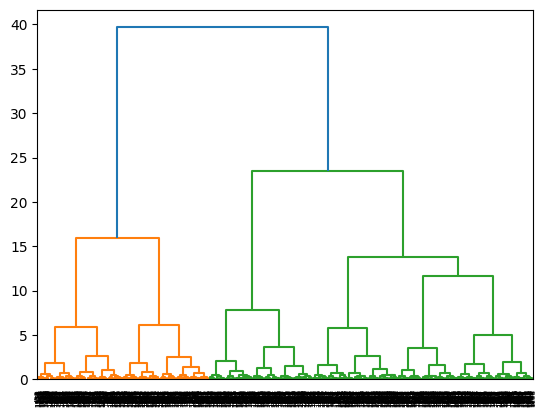

In [5]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [6]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")

In [7]:
labels = hierarchical_cluster.fit_predict(data)

/Users/rutvikdhopate/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


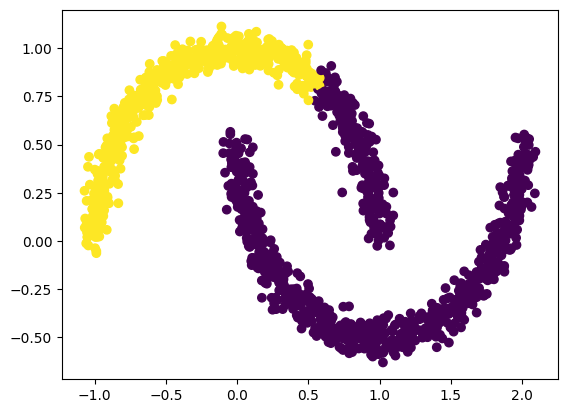

In [8]:
plt.scatter(moons['Xmoons_X1'],moons['Xmoons_X2'], c=labels)
plt.show()

In [9]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([980, 520]))

In [10]:
centres = np.column_stack((moons['Xmoons_X1'],moons['Xmoons_X2']))

In [11]:
distances = cdist(centres,centres)

In [259]:
distances

array([[0.        , 1.52966049, 2.4664835 , ..., 2.24405125, 0.32324479,
        0.90987476],
       [1.52966049, 0.        , 1.16672177, ..., 0.74946434, 1.7013279 ,
        1.83432287],
       [2.4664835 , 1.16672177, 0.        , ..., 1.1455974 , 2.71430823,
        2.96407266],
       ...,
       [2.24405125, 0.74946434, 1.1455974 , ..., 0.        , 2.37445589,
        2.37765674],
       [0.32324479, 1.7013279 , 2.71430823, ..., 2.37445589, 0.        ,
        0.62528208],
       [0.90987476, 1.83432287, 2.96407266, ..., 2.37765674, 0.62528208,
        0.        ]])

In [67]:
dist_lt = np.tril(distances)

In [68]:
updated_dist = []
for i in range(len(dist_lt)):
    for j in range(i + 1):  # Include diagonal elements
        updated_dist.append(dist_lt[i])


In [77]:
i = 0
dist_lt[i:,i]

array([0.        , 1.52966049, 2.4664835 , ..., 2.24405125, 0.32324479,
       0.90987476])

In [142]:
updated_dist = []
point_ids = []
for i in range(moons.shape[0]):
    for j, elem in enumerate(dist_lt[i+1:, i]):
        updated_dist.append(elem)
        point_ids.append((i, i + j))

updated_dist = np.array(updated_dist)
point_ids = np.array(point_ids)

In [170]:
distances.reshape(1500*1500,1)

array([[0.        ],
       [1.52966049],
       [2.4664835 ],
       ...,
       [2.37765674],
       [0.62528208],
       [0.        ]])

In [143]:
### This value is same as 15 Choose 2 + diagonal elements i.e. 1500 = 1125750
len(updated_dist)

1124250

In [172]:
1500*1499/2

1124250.0

In [102]:
dist_lt[4:,4]

(1496,)

In [144]:
linkage_df = pd.DataFrame()

In [145]:
linkage_df["row_id"] = np.array(range(updated_dist.shape[0]))

In [146]:
linkage_df["id_1"] = point_ids[:,0]
linkage_df["id_2"] = point_ids[:,1]

In [147]:
linkage_df["distances"] = updated_dist

In [154]:
np.argmin(linkage_df['distances'])

700758

In [159]:
print(linkage_df['id_1'][700758],linkage_df['id_2'][700758])

579 747


In [165]:
cdist([centres[579]],[centres[747]])

array([[1.89169295]])

In [166]:
linkage_df

,row_id,id_1,id_2,distances
0,0,0,0,1.529660
1,1,0,1,2.466484
2,2,0,2,1.537556
3,3,0,3,2.496437
4,4,0,4,2.066469
...,...,...,...,...
1124245,1124245,1496,1497,1.001606
1124246,1124246,1496,1498,0.996013
1124247,1124247,1497,1497,2.374456
1124248,1124248,1497,1498,2.377657


In [173]:
distances

array([[0.        , 1.52966049, 2.4664835 , ..., 2.24405125, 0.32324479,
        0.90987476],
       [1.52966049, 0.        , 1.16672177, ..., 0.74946434, 1.7013279 ,
        1.83432287],
       [2.4664835 , 1.16672177, 0.        , ..., 1.1455974 , 2.71430823,
        2.96407266],
       ...,
       [2.24405125, 0.74946434, 1.1455974 , ..., 0.        , 2.37445589,
        2.37765674],
       [0.32324479, 1.7013279 , 2.71430823, ..., 2.37445589, 0.        ,
        0.62528208],
       [0.90987476, 1.83432287, 2.96407266, ..., 2.37765674, 0.62528208,
        0.        ]])

In [87]:
distances = cdist(centres,centres)

In [310]:
distances

array([[0.        , 1.52966049, 2.4664835 , ..., 2.24405125, 0.32324479,
        0.90987476],
       [1.52966049, 0.        , 1.16672177, ..., 0.74946434, 1.7013279 ,
        1.83432287],
       [2.4664835 , 1.16672177, 0.        , ..., 1.1455974 , 2.71430823,
        2.96407266],
       ...,
       [2.24405125, 0.74946434, 1.1455974 , ..., 0.        , 2.37445589,
        2.37765674],
       [0.32324479, 1.7013279 , 2.71430823, ..., 2.37445589, 0.        ,
        0.62528208],
       [0.90987476, 1.83432287, 2.96407266, ..., 2.37765674, 0.62528208,
        0.        ]])

In [290]:
### Step - Convert diag to pos inf
### Get the min dist from dist matrix
### Get the shape or ids for that corresponding min dist
### Calculate the new minimum of the two rows and delete the ith and jth point from the original distance matrix
### Replace the deleted rows with the new minimums of the two rows and the diagonal elements should always be pos inf

In [311]:
### Step 1 - Convert diag to pos inf
np.fill_diagonal(distances, np.inf)

In [312]:
### Step 2, 3 get the minimum distance and the corresponding shapes/ids of the distance matrix
min_dist = np.min(distances)
id_1, id_2 = np.unravel_index(np.argmin(distances),distances.shape)

In [293]:
### These ids are the rows and columns which need to be deleted from the original matrix 

In [313]:
### Step 4 - Minimum of the two rows from original distance matrix
new_min = np.minimum(distances[id_1],distances[id_2])

In [314]:
### Delete the minimum distance from the new_min
new_min = np.delete(new_min, [id_1,id_2])

In [315]:
### Now, we have the row to add and delete in the distance matrix
### Delete the rows and columns coresponding to id_1 and id_2 from original distances

distances = np.delete(distances, [id_1,id_2], axis = 0)
distances = np.delete(distances, [id_1,id_2], axis = 1)

In [316]:
distances = np.vstack([new_min,distances])

In [317]:
### Add np.inf to index 0 in new_min
new_min = np.insert(new_min, 0, np.inf)

In [318]:
distances = np.hstack([np.expand_dims(new_min, axis=1), distances])

In [319]:
distances.shape

(1499, 1499)

In [55]:
distances.shape

(1500, 1500)

In [304]:
print(id_1,id_2)

579 748


In [13]:
def hierarchical_clustering(distances, k):

    
    cluster_dict = {n:n for n in range(1500)}

    def update_cluster_dict(i1,i2):
        minimum = min(i1,i2)
        maximum = max(i1,i2)
        for i in cluster_dict:
            if cluster_dict[i] == minimum or cluster_dict[i] == maximum:
                cluster_dict[i] = 0
            elif cluster_dict[i] < minimum:
                cluster_dict[i] = cluster_dict[i] + 1
            elif cluster_dict[i] > maximum:
                cluster_dict[i] = cluster_dict[i] - 1
        return cluster_dict
    
    
    ### Step 1 - Convert diag to pos inf
    np.fill_diagonal(distances, np.inf)
    
    while distances.shape[0] > k-1:
        
        ### Step 2, 3 get the minimum distance and the corresponding shapes/ids of the distance matrix
        ### These ids are the rows and columns which need to be deleted from the original matrix 
        
        min_dist = np.min(distances)
        id_1, id_2 = np.unravel_index(np.argmin(distances),distances.shape)

        ### Step 4 - Minimum of the two rows from original distance matrix
        new_min = np.minimum(distances[id_1],distances[id_2])

        ### Delete the minimum distance from the new_min
        new_min = np.delete(new_min, [id_1,id_2])

        ### Now, we have the row to add and delete in the distance matrix
        ### Delete the rows and columns coresponding to id_1 and id_2 from original distances
        
        distances = np.delete(distances, [id_1,id_2], axis = 0)
        distances = np.delete(distances, [id_1,id_2], axis = 1)

        ### Add the new row at index 0
        distances = np.vstack([new_min,distances])

        ### Add np.inf to index 0 in new_min
        new_min = np.insert(new_min, 0, np.inf)

        ### Add the new column at index 0
        distances = np.hstack([np.expand_dims(new_min, axis=1), distances])
        
        print(distances.shape[0])

        ### Dealing with cluster ids
        cluster_dict[id_1] = 0
        cluster_dict[id_2] = 0

        print(id_1,id_2)

        cluster_dict = update_cluster_dict(id_1,id_2)
        # print(Counter(cluster_dict.values()))

    return cluster_dict

In [31]:
distances = cdist(centres,centres)

In [32]:
cluster_dict = hierarchical_clustering(distances, 7)

1499
579 748
1498
381 950
1497
888 979
1496
852 1160
1495
1069 1406
1494
605 831
1493
175 1360
1492
94 311
1491
1030 1353
1490
179 279
1489
434 952
1488
67 598
1487
351 1005
1486
645 877
1485
119 926
1484
1159 1346
1483
1007 1360
1482
16 1430
1481
427 619
1480
103 1225
1479
703 1221
1478
720 1129
1477
807 1002
1476
640 1441
1475
397 542
1474
180 1202
1473
738 1143
1472
612 1222
1471
137 643
1470
860 1257
1469
499 1336
1468
286 1071
1467
119 257
1466
1074 1289
1465
566 952
1464
585 738
1463
615 1356
1462
1276 1314
1461
545 925
1460
381 542
1459
869 1110
1458
788 1265
1457
3 1330
1456
726 1159
1455
543 1394
1454
663 1275
1453
560 606
1452
924 1318
1451
530 1116
1450
1103 1431
1449
925 1185
1448
5 186
1447
1176 1211
1446
1023 1219
1445
259 304
1444
476 731
1443
889 1327
1442
781 1146
1441
373 1389
1440
1260 1365
1439
389 1347
1438
352 626
1437
81 408
1436
53 1187
1435
37 369
1434
460 465
1433
46 1110
1432
263 800
1431
1168 1324
1430
24 245
1429
874 1196
1428
1117 1315
1427
84 975
1426
88 

In [33]:
cluster_dict

{0: 1,
 1: 1,
 2: 0,
 3: 1,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 0,
 10: 0,
 11: 1,
 12: 1,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 0,
 21: 0,
 22: 1,
 23: 1,
 24: 0,
 25: 0,
 26: 0,
 27: 1,
 28: 1,
 29: 1,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 1,
 36: 1,
 37: 0,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 0,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 0,
 50: 1,
 51: 1,
 52: 1,
 53: 0,
 54: 1,
 55: 0,
 56: 1,
 57: 0,
 58: 1,
 59: 0,
 60: 0,
 61: 1,
 62: 0,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 0,
 69: 0,
 70: 1,
 71: 0,
 72: 1,
 73: 0,
 74: 0,
 75: 0,
 76: 1,
 77: 0,
 78: 1,
 79: 0,
 80: 0,
 81: 1,
 82: 0,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 0,
 90: 1,
 91: 1,
 92: 0,
 93: 0,
 94: 1,
 95: 1,
 96: 0,
 97: 1,
 98: 0,
 99: 1,
 100: 0,
 101: 1,
 102: 0,
 103: 1,
 104: 0,
 105: 0,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 0,
 111: 1,
 112: 0,
 113: 1,
 114: 1,
 115: 0,
 116: 1,
 117: 0,
 118: 1,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [19]:
from collections import Counter

In [34]:
Counter(cluster_dict.values())

Counter({1: 757, 0: 741, 5: 1, 2: 1})

In [305]:
### Create a new data structure, say dict {row_number:c_id}

In [ ]:
### {0:0, 1:1,,....., 579:579, ..., 748:748, ..., 1499:1499}

### Here, 579 and 748 were closest (these are the indices in the distance matrix)
### {0:1, 1:2,,....., 579:0, ..., 748:0, ..., 1499:1499}

### Now, 1 and 2 are the closest
### {0:0, 1:0, ..., 579:1, ... 748:1, ....,  }


### Take 100 data points from moons, run the loop 99 times to get 2 cluster ids, and plot a scatter plot where color = c_id



In [306]:
distances

array([[       inf, 2.44429905, 1.00850494, ..., 0.82289156, 2.66241814,
        2.84230794],
       [2.44429905,        inf, 1.52966049, ..., 2.24405125, 0.32324479,
        0.90987476],
       [1.00850494, 1.52966049,        inf, ..., 0.74946434, 1.7013279 ,
        1.83432287],
       ...,
       [0.82289156, 2.24405125, 0.74946434, ...,        inf, 2.37445589,
        2.37765674],
       [2.66241814, 0.32324479, 1.7013279 , ..., 2.37445589,        inf,
        0.62528208],
       [2.84230794, 0.90987476, 1.83432287, ..., 2.37765674, 0.62528208,
               inf]])

In [37]:
cluster_dict = {n:n for n in range(7)}

In [38]:
cluster_dict

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [46]:
def update_cluster_dict(i1,i2):
    minimum = min(i1,i2)
    maximum = max(i1,i2)
    cluster_dict[i1] = 0
    cluster_dict[i2] = 0
    for i in cluster_dict:
        if i != minimum and i != maximum:
            if i < minimum:
                cluster_dict[i]+=1
            elif i > maximum:
                cluster_dict[i]-=1

    return cluster_dict

In [40]:
update_cluster_dict(1,3)

{0: 1, 1: 0, 2: 2, 3: 0, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}

In [39]:
i1, i2 = 1,4
minimum = min(i1,i2)
maximum = max(i1,i2)
# cluster_dict[i1] = 0
# cluster_dict[i2] = 0
for i in cluster_dict:
    if cluster_dict[i] == minimum or cluster_dict[i] == maximum:
        cluster_dict[i] = 0
    elif cluster_dict[i] < minimum:
        print("Less than",i)
        cluster_dict[i]+=1
    elif cluster_dict[i] > maximum:
        print("Greater than",i)
        cluster_dict[i]-=1

Less than 0
Greater than 5
Greater than 6


In [40]:
cluster_dict

{0: 1, 1: 0, 2: 2, 3: 3, 4: 0, 5: 4, 6: 5}

In [70]:
cluster_dict

{0: 2, 1: 1, 2: 0, 3: 0, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}